In [1]:
#import cv2 
from tensorflow.keras.models import load_model 
import numpy as np
from PIL import Image 
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
#importing the trained model
model = load_model('MaskDetectionTrained.h5')

In [3]:
#preprocess the testing images
def prepare(direct):
    test_batches  = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function = tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(
    direct,
    target_size=(224, 224),
    batch_size=10,
    classes = ['unmasked', 'masked'],
    shuffle = False)

    return test_batches

In [4]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [5]:
test_batches = prepare('TestYourOwnImages')

Found 10 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

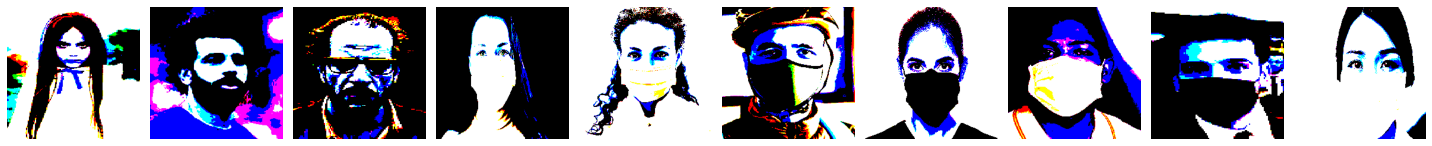

[0 0 0 1 1 1 1 1 1 1]


In [6]:
#previwing the images 10 by 10
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(np.argmax(test_labels, axis=1))

In [7]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=1)

1/1 [==============================] - 0s 4ms/step


In [8]:
np.round(predictions)

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [9]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.round(predictions))
print(cm)
accuracy_score(y_true=test_batches.classes, y_pred=np.round(predictions))

[[3 0]
 [0 7]]


1.0